In [28]:
#import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import model_from_json

import pickle
import tkinter as tk
from tkinter import filedialog
from tkinter import PhotoImage
from pygame import mixer
import matplotlib.pyplot as plt
import random
import os

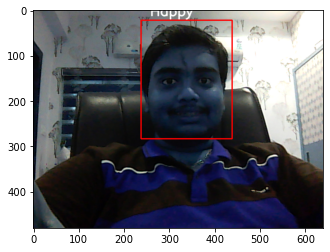

In [24]:
#Taking picture from webcam and detecting emotion
#load model  
model = model_from_json(open("model.json", "r").read()) 
#load weights
model.load_weights('model.h5')
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
cap=cv2.VideoCapture(0)
ret, frame =cap.read()

facecasc = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    dominantemotion=emotion_dict[maxindex]
#cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
plt.imshow(frame)
cap.release()
cv2.destroyAllWindows()

In [29]:
#Playing music from detected emotion
class Playe(tk.Frame):
        def __init__(self, dominantemotion , master=None):
                super().__init__(master)
                self.master = master
                self.pack()
                mixer.init()
                self.dominantemotion=dominantemotion
                print(self.dominantemotion)
            
                self.playlist=[]
                self.current = 0
                self.paused = True
                self.played = False


                self.create_frames()
                self.track_widgets()
                self.control_widgets()
                self.tracklist_widgets()
                self.retrieve_songs()

        def create_frames(self):
                self.track = tk.LabelFrame(self, text='Song Track',
                                        font=("times new roman",15,"bold"),
                                        bg="grey",fg="white",bd=5,relief=tk.GROOVE)
                self.track.config(width=410,height=300)
                self.track.grid(row=0, column=0, padx=10)

                self.tracklist = tk.LabelFrame(self, text=f'PlayList - {str(len(self.playlist))}',
                                                        font=("times new roman",15,"bold"),
                                                        bg="grey",fg="white",bd=5,relief=tk.GROOVE)
                self.tracklist.config(width=190,height=400)
                self.tracklist.grid(row=0, column=1, rowspan=3, pady=5)

                self.controls = tk.LabelFrame(self,
                                                        font=("times new roman",15,"bold"),
                                                        bg="white",fg="white",bd=2,relief=tk.GROOVE)
                self.controls.config(width=410,height=80)
                self.controls.grid(row=2, column=0, pady=5, padx=10)

        def track_widgets(self):
                self.canvas = tk.Label(self.track, image=img)
                self.canvas.configure(width=400, height=240)
                self.canvas.grid(row=0,column=0)

                self.songtrack = tk.Label(self.track, font=("times new roman",16,"bold"),
                                                bg="white",fg="dark blue")
                self.songtrack['text'] = 'VFSTR MP3 Player'
                self.songtrack.config(width=30, height=1)
                self.songtrack.grid(row=1,column=0,padx=10)

        def control_widgets(self):

                self.prev = tk.Button(self.controls, image=prev)
                self.prev['command'] = self.prev_song
                self.prev.grid(row=0, column=1)

                self.pause = tk.Button(self.controls, image=pause)
                self.pause['command'] = self.pause_song
                self.pause.grid(row=0, column=2)

                self.next = tk.Button(self.controls, image=next_)
                self.next['command'] = self.next_song
                self.next.grid(row=0, column=3)

                self.volume = tk.DoubleVar(self)
                self.slider = tk.Scale(self.controls, from_ = 0, to = 10, orient = tk.HORIZONTAL)
                self.slider['variable'] = self.volume
                self.slider.set(8)
                mixer.music.set_volume(0.8)
                self.slider['command'] = self.change_volume
                self.slider.grid(row=0, column=4, padx=5)


        def tracklist_widgets(self):
                self.scrollbar = tk.Scrollbar(self.tracklist, orient=tk.VERTICAL)
                self.scrollbar.grid(row=0,column=1, rowspan=5, sticky='ns')

                self.list = tk.Listbox(self.tracklist, selectmode=tk.SINGLE,
                                         yscrollcommand=self.scrollbar.set, selectbackground='sky blue')
                self.enumerate_songs()
                self.list.config(height=22)
                self.list.bind('<Double-1>', self.play_song)

                self.scrollbar.config(command=self.list.yview)
                self.list.grid(row=0, column=0, rowspan=5)

        def retrieve_songs(self):
                self.songlist = []
                if(self.dominantemotion=='angry'):
                        directory = r'C:\Users\USER\Downloads\Code\Angry'
                elif(self.dominantemotion=='Surprised'):
                        directory = r'C:\Users\USER\Downloads\Code\Sad'
                elif(self.dominantemotion=='Happy'):
                        directory = r'C:\Users\USER\Downloads\Code\Happy'
                elif(self.dominantemotion=='Neutral'):
                        directory = r'C:\Users\USER\Downloads\Code\Neutral'
                elif(self.dominantemotion=='fear'):
                        directory = r'C:\Users\USER\Downloads\Code\Fear'

                #filedialog.askdirectory()
                for root_, dirs, files in os.walk(directory):
                        for file in files:
                                if os.path.splitext(file)[1] == '.mp3':
                                        path = (root_ + '/' + file).replace('\\','/')
                                        self.songlist.append(path)
                self.playlist = self.songlist
                random.shuffle(self.playlist)
                self.tracklist['text'] = f'PlayList - {str(len(self.playlist))}'
                self.list.delete(0, tk.END)
                self.enumerate_songs()
                self.play_song()
        def enumerate_songs(self):
                for index, song in enumerate(self.playlist):
                        self.list.insert(index, os.path.basename(song))


        def play_song(self, event=None):
                if event is not None:
                        self.current = self.list.curselection()[0]
                        for i in range(len(self.playlist)):
                                self.list.itemconfigure(i, bg="white")

                print(self.playlist[self.current])
                mixer.music.load(self.playlist[self.current])
                self.songtrack['anchor'] = 'w'
                self.songtrack['text'] = os.path.basename(self.playlist[self.current])

                self.pause['image'] = play
                self.paused = False
                self.played = True
                self.list.activate(self.current)
                self.list.itemconfigure(self.current, bg='sky blue')

                mixer.music.play()

        def pause_song(self):
                if not self.paused:
                        self.paused = True
                        mixer.music.pause()
                        self.pause['image'] = pause
                else:
                        if self.played == False:
                                self.play_song()
                        self.paused = False
                        mixer.music.unpause()
                        self.pause['image'] = play

        def prev_song(self):
                if self.current > 0:
                        self.current -= 1
                        self.list.itemconfigure(self.current + 1, bg='white')
                else:
                        self.current = 0
                self.play_song()

        def next_song(self):
                if self.current < len(self.playlist) - 1:
                        self.list.itemconfigure(self.current, bg='white')
                        self.current += 1
                else:
                        self.current = 0
                        self.list.itemconfigure(len(self.playlist) - 1, bg='white')
                self.play_song()



        def change_volume(self, event=None):
                self.v = self.volume.get()
                mixer.music.set_volume(self.v / 10)
                

root = tk.Tk()
root.geometry('600x400')
root.wm_title('VFSTR Music Recommendation System')

img = PhotoImage(master=root,file=r'C:\Users\USER\Downloads\Code\images\music.gif')
next_ = PhotoImage(master=root,file = r'C:\Users\USER\Downloads\Code\images\next.gif')
prev = PhotoImage(master=root,file=r'C:\Users\USER\Downloads\Code\images\previous.gif')
play = PhotoImage(master=root,file=r'C:\Users\USER\Downloads\Code\images\play.gif')
pause = PhotoImage(master=root,file=r'C:\Users\USER\Downloads\Code\images\pause.gif')

app = Playe(dominantemotion, master=root)
app.mainloop() 


Happy
C:/Users/USER/Downloads/Code/Happy/Bhale Manchi Roju Jarigina Katha Telugu Old Classics Ghantasala YouTube.mp3


In [1]:
pwd

'C:\\Users\\USER\\Downloads\\Project\\Emotio Detection'